#### `copy` vs `deepcopy`
1. **얕은 복사**(`=`, `[:]`,`copy.copy`)
- 변수 복사? 실제로는 객체 전체 복사X, 연결되어(참조) 있음
- "참조"만 복사한 것
- Ex) 
    ```python
    arr1=[1,2,3]         
    arr2=arr1
    ```
    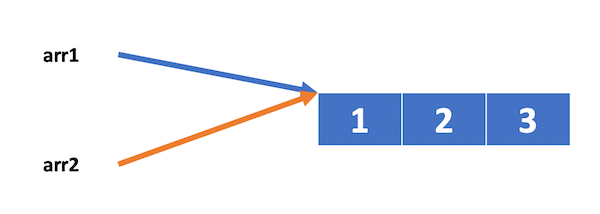
- arr1이 append하면 arr2도 동일하게 적용됨      

    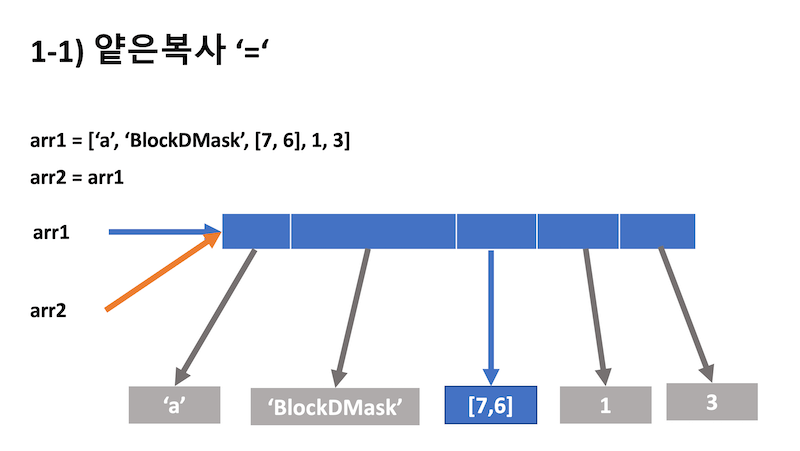
    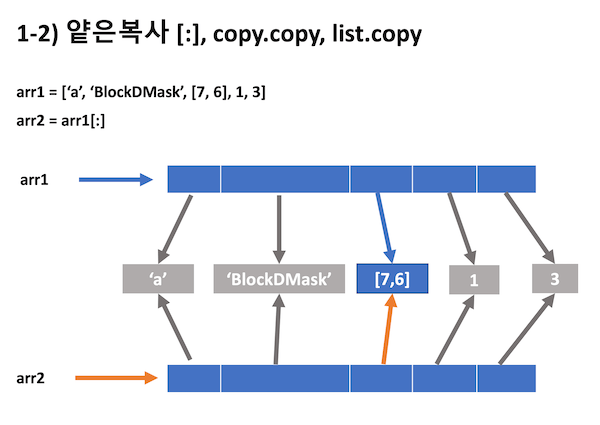
2. **깊은 복사**(`copy.deepcopy`)
- 얕은 복사와 다르게 복사한 이후부터 독립적으로 된다.
    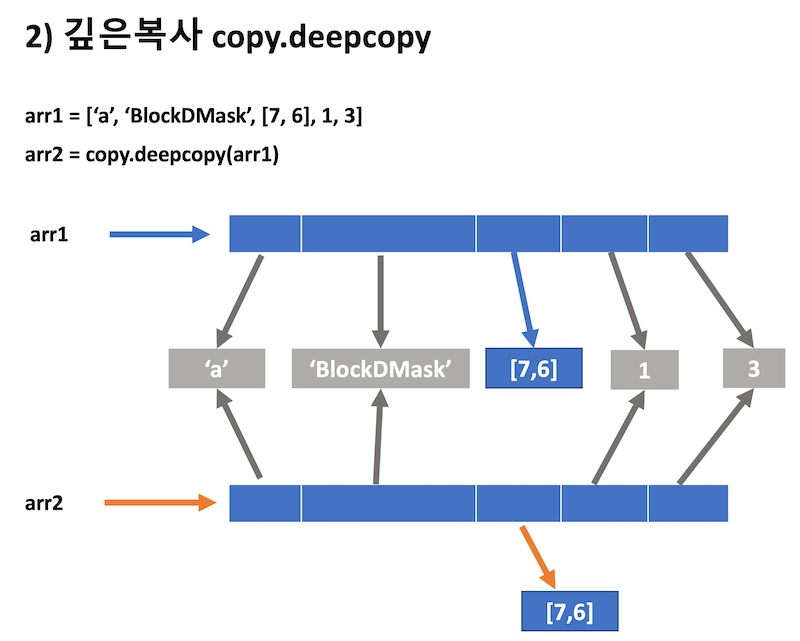

In [ ]:
from itertools import combinations
import copy

N, M = map(int, input().split())
graph = [list(map(int, input().split())) for _ in range(N)]

dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]

def DFS(x, y, lab_copy):
    stack = [(x, y)]
    while stack:
        cx, cy = stack.pop()
        for i in range(4):
            nx, ny = cx + dx[i], cy + dy[i]
            if 0 <= nx < N and 0 <= ny < M and lab_copy[nx][ny] == 0:
                lab_copy[nx][ny] = 2
                stack.append((nx, ny))

# 안전 영역의 크기를 계산하는 함수
def get_safe_area(lab):
    # 초기 바이러스 위치 찾기
    virus_positions = [(i, j) for i in range(N) for j in range(M) if lab[i][j] == 2]

    # 비어있는 위치 찾기
    max_safe_area = 0
    empty_positions = [(i, j) for i in range(N) for j in range(M) if lab[i][j] == 0]

    # 벽을 배치하고 안전 영역 계산
    for walls in combinations(empty_positions, 3):
        lab_copy = copy.deepcopy(lab)

        # 추출된 3가지 벽 배치
        for wx, wy in walls:
            lab_copy[wx][wy] = 1

        # 바이러스 시작 위치에서 DFS로 퍼뜨리기
        for vx, vy in virus_positions:
            DFS(vx, vy, lab_copy)
        
        # 안전 영역 세기
        safe_area = sum(row.count(0) for row in lab_copy)
        # 안전 영역 최대 찾기
        max_safe_area = max(max_safe_area, safe_area)

    return max_safe_area

# 최대 안전 영역 계산
print(get_safe_area(graph))